In [1]:
# Reading clean data from output.std file, finding monthly and annual data and making graphs
# also extracting winter daily and monthly average data - for winter months

In [1]:
### importing required resources
import pandas as pd
import numpy as np
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [208]:
### specifying file location
file = 'C:/Users/jaska/Desktop/SWAT_lag_factor_calibration/clean_data/04.xlsx'

In [209]:
### reading the file into dataframe
output_std = pd.read_excel(file)

In [187]:
### getting info about dataframe size and type
output_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             3287 non-null   int64         
 1   prec_mm          3287 non-null   float64       
 2   surq_mm          3287 non-null   float64       
 3   latq_mm          3287 non-null   int64         
 4   gwq_mm           3287 non-null   float64       
 5   perco_mm         3287 non-null   float64       
 6   tileq_mm         3287 non-null   float64       
 7   sw_mm            3287 non-null   float64       
 8   et_mm            3287 non-null   float64       
 9   pet_mm           3287 non-null   float64       
 10  wateryield_mm    3287 non-null   float64       
 11  sedyield_mtpha   3287 non-null   float64       
 12  no3surq_kgnpha   3287 non-null   float64       
 13  no3latq_kgnpha   3287 non-null   int64         
 14  no3perc_kgnpha   3287 non-null   float64

In [97]:
# looking at the shape of the df
output_std.shape

(3287, 21)

In [8]:
# dropping the unwanted columns
# output_std.drop(columns=['time'], inplace=True, axis=1)

In [210]:
# dropping all rows with missing values
output_std.dropna(how='any', inplace=True, axis=0)

In [211]:
# Let us look at monthly yields
# but first we need to get total values added over months

### setting date as index in the data set
output_std.set_index('date')

### resampling data so that we have monthly added values
monthly = output_std.resample('M', on='date').sum()

### dropping empty rows in newly created data set
monthly.dropna(axis = 0, how = 'any', inplace=True)

# looking at new df
monthly.head()

,time,prec_mm,surq_mm,latq_mm,gwq_mm,perco_mm,tileq_mm,sw_mm,et_mm,pet_mm,wateryield_mm,sedyield_mtpha,no3surq_kgnpha,no3latq_kgnpha,no3perc_kgnpha,no3crop_kgnpha,norgload_kgnpha,psolload_kgppha,porgload_kgppha,no3tile_kgnpha
date,,,,,,,,,,,,,,,,,,,,
2010-01-31,496,45.2,26.39,0,18.54,0.06,0.00,5138.95,1.14,2.25,46.01,0.08,0.02,0,0.00,0.0,0.70,0.01,0.09,0.00
2010-02-28,1274,30.2,0.24,0,8.20,0.01,0.00,4755.77,1.46,2.94,9.20,0.00,0.00,0,0.00,0.0,0.00,0.00,0.00,0.00
2010-03-31,2325,19.0,48.84,0,8.58,28.10,2.09,4965.90,20.44,36.63,60.30,0.11,0.07,0,6.10,0.0,1.24,0.02,0.16,0.42
2010-04-30,3165,39.8,2.92,0,15.23,15.40,0.11,4490.62,27.85,59.76,19.06,0.00,0.06,0,3.33,0.0,0.02,0.00,0.00,0.01
2010-05-31,4216,88.8,17.57,0,18.10,25.15,0.19,4640.74,47.21,92.56,36.70,0.03,0.06,0,6.50,3.5,0.26,0.00,0.03,0.01


In [212]:
# it will be interesting to see what is going on in the winters
# from our earlier data exploration, we found that Dec-Mar is when soil is most cold at 10 cm at Londes site


### dividing the daily dataset into different months
jan = output_std.loc[output_std['date'].dt.month == 1]
feb = output_std.loc[output_std['date'].dt.month == 2]
mar = output_std.loc[output_std['date'].dt.month == 3]
apr = output_std.loc[output_std['date'].dt.month == 4]
may = output_std.loc[output_std['date'].dt.month == 5]
jun = output_std.loc[output_std['date'].dt.month == 6]
jul = output_std.loc[output_std['date'].dt.month == 7]
aug = output_std.loc[output_std['date'].dt.month == 8]
sep = output_std.loc[output_std['date'].dt.month == 9]
otb = output_std.loc[output_std['date'].dt.month == 10]
nov = output_std.loc[output_std['date'].dt.month == 11]
dec = output_std.loc[output_std['date'].dt.month == 12]

In [213]:
# combining winter months into one df
winter = pd.concat([dec, jan, feb, mar], ignore_index = True)

In [102]:
winter.head()

,time,prec_mm,surq_mm,latq_mm,gwq_mm,perco_mm,tileq_mm,sw_mm,et_mm,pet_mm,...,sedyield_mtpha,no3surq_kgnpha,no3latq_kgnpha,no3perc_kgnpha,no3crop_kgnpha,norgload_kgnpha,psolload_kgppha,porgload_kgppha,no3tile_kgnpha,date
0,335,2.8,0.0,0,0.26,4.12,0.23,164.45,0.46,0.46,...,0.0,0.01,0,1.43,0.0,0.0,0.0,0.0,0.05,2010-12-01
1,336,1.5,0.0,0,0.29,2.75,0.04,161.53,0.13,0.14,...,0.0,0.00,0,0.90,0.0,0.0,0.0,0.0,0.01,2010-12-02
2,337,3.3,0.0,0,0.32,1.83,0.00,159.69,0.00,0.00,...,0.0,0.00,0,0.58,0.0,0.0,0.0,0.0,0.00,2010-12-03
3,338,1.2,0.0,0,0.35,1.24,0.00,158.46,0.00,0.00,...,0.0,0.00,0,0.37,0.0,0.0,0.0,0.0,0.00,2010-12-04
4,339,4.9,0.0,0,0.38,0.85,0.00,157.61,0.00,0.00,...,0.0,0.00,0,0.25,0.0,0.0,0.0,0.0,0.00,2010-12-05


In [214]:
wint = winter.set_index('date')

Text(0, 0.5, 'tile flow contribution to stream in mm')

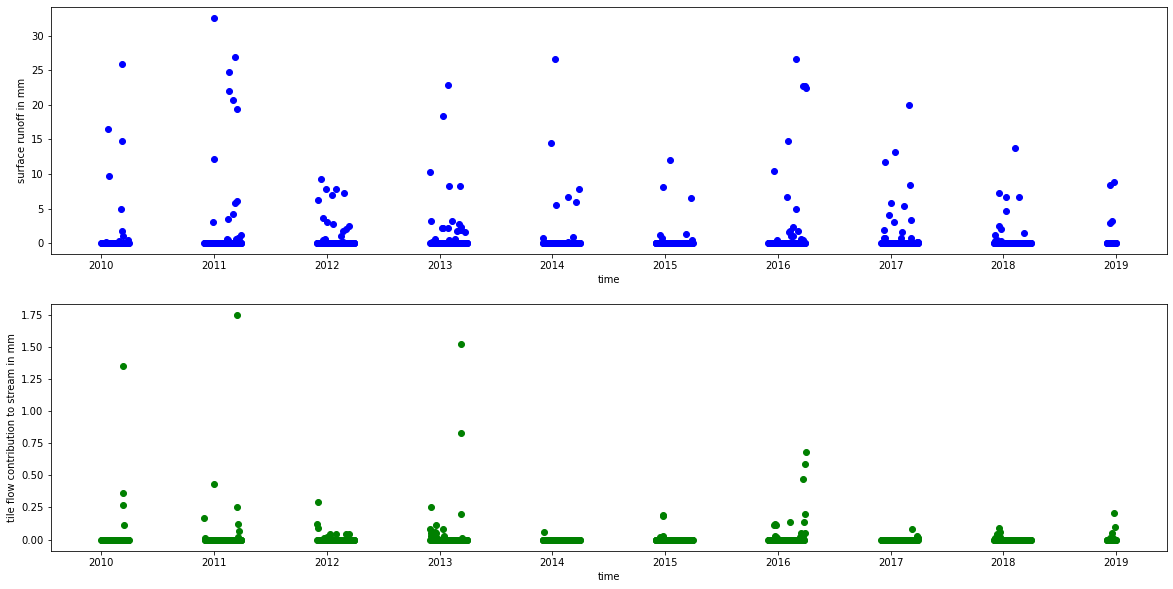

In [215]:
### plotting time series for winter months in all years
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(wint.index.values, wint.surq_mm, c='b')
plt.xlabel('time')
plt.ylabel('surface runoff in mm')
plt.subplot(2,1,2)
plt.scatter(wint.index.values, wint.tileq_mm, c='g')
plt.xlabel('time')
plt.ylabel('tile flow contribution to stream in mm')

Text(0, 0.5, 'tile flow contribution to stream in mm')

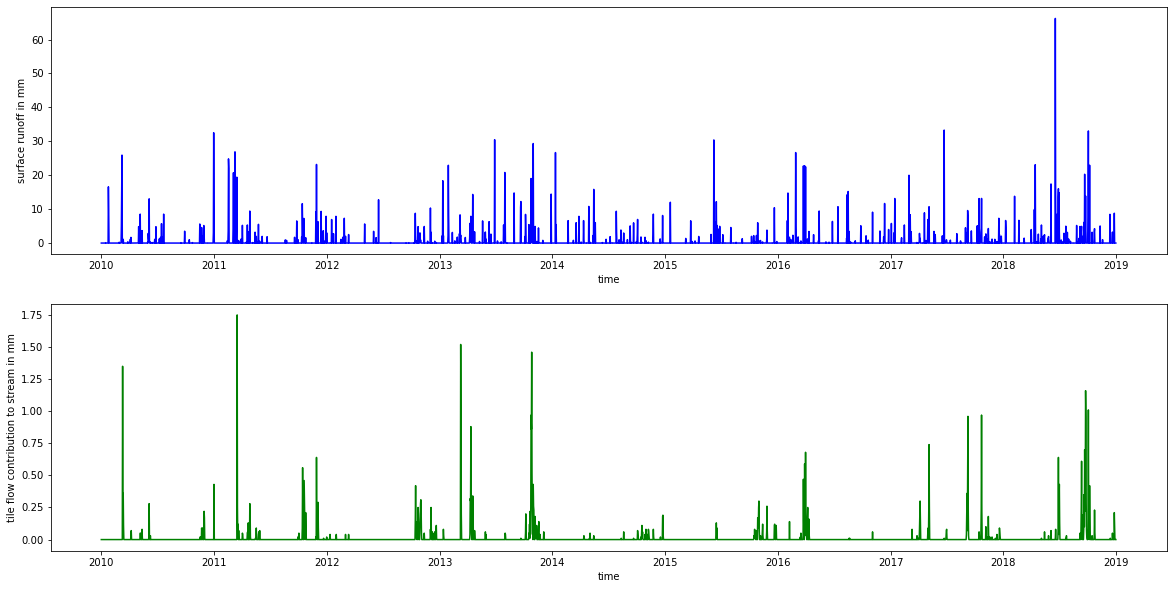

In [216]:
### plotting time series for all months all years
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(output_std.date, output_std.surq_mm, c='b')
plt.xlabel('time')
plt.ylabel('surface runoff in mm')
plt.subplot(2,1,2)
plt.plot(output_std.date, output_std.tileq_mm, c='g')
plt.xlabel('time')
plt.ylabel('tile flow contribution to stream in mm')

In [202]:
# getting a dataset when tile event occured
winter_tile = winter.loc[winter['tileq_mm']>0]

In [203]:
# total number of days in winter
outof = winter.shape[0]
print(outof)

1091


In [204]:
# total number of days in winter when tiles ran
tiledays=winter_tile.shape[0]
print(tiledays)

70


In [205]:
# percentage of days when tiles flow in winter
tileflowpct = 100*(tiledays/outof)
print(tileflowpct, '% of the winter days, the tiles were running.')

6.416131989000917 % of the winter days, the tiles were running.


In [206]:
total_tileq = winter_tile.tileq_mm.sum()
print('total annual tile flow in winters from 2010 to 2019: ', (total_tileq/9), 'mm')

total annual tile flow in winters from 2010 to 2019:  1.2944444444444445 mm


In [207]:
total_tileq

11.65

Text(0, 0.5, 'tile flow contribution to stream in mm')

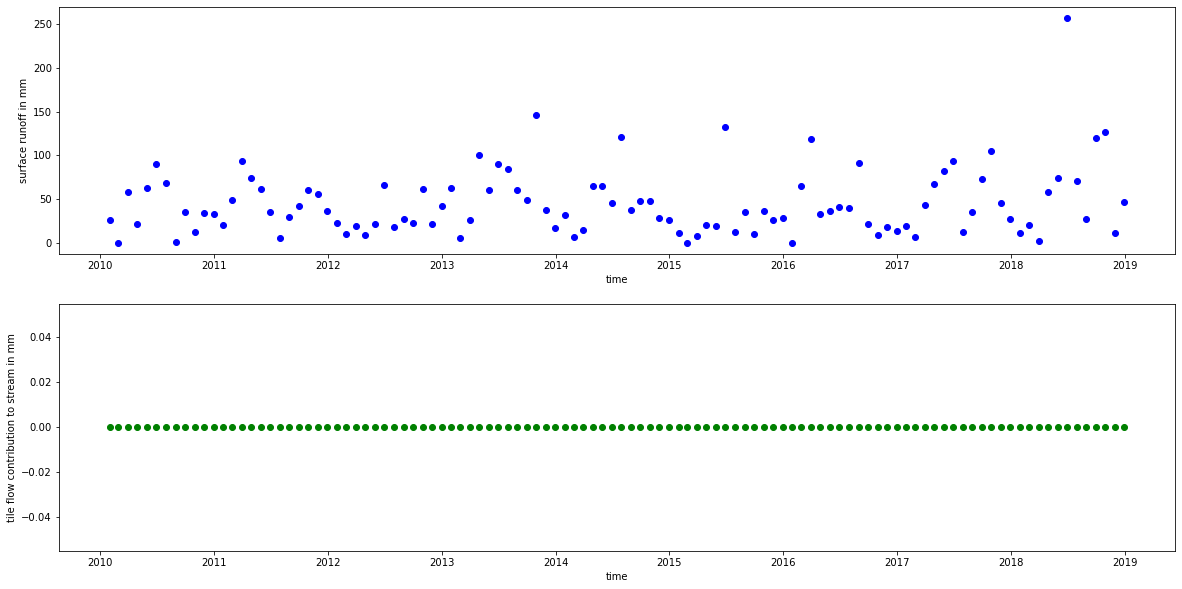

In [147]:
### plotting time series for monthly added values for all years

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(monthly.index.values, monthly.surq_mm, c='b')
plt.xlabel('time')
plt.ylabel('surface runoff in mm')
plt.subplot(2,1,2)
plt.scatter(monthly.index.values, monthly.tileq_mm, c='g')
plt.xlabel('time')
plt.ylabel('tile flow contribution to stream in mm')

In [148]:
# Finding average values for each julian day (1-365) for 9 years.

### grouping data by julian day (1-365)
ann_avg = output_std.groupby('time').mean()

### dropping empty rows in newly created data set
ann_avg.dropna(axis = 0, how = 'any', inplace=True)

# looking at new df
ann_avg.head()

,prec_mm,surq_mm,latq_mm,gwq_mm,perco_mm,tileq_mm,sw_mm,et_mm,pet_mm,wateryield_mm,sedyield_mtpha,no3surq_kgnpha,no3latq_kgnpha,no3perc_kgnpha,no3crop_kgnpha,norgload_kgnpha,psolload_kgppha,porgload_kgppha,no3tile_kgnpha
time,,,,,,,,,,,,,,,,,,,
1,2.011111,2.598889,0,0,0,0,148.056667,0.043333,0.130000,2.652222,0.0,0.0,0,0,0.0,0.012222,0.0,0.002222,0
2,0.411111,0.000000,0,0,0,0,147.981111,0.076667,0.194444,0.415556,0.0,0.0,0,0,0.0,0.001111,0.0,0.000000,0
3,2.894444,0.518889,0,0,0,0,148.367778,0.044444,0.106667,0.514444,0.0,0.0,0,0,0.0,0.001111,0.0,0.000000,0
4,1.711111,0.000000,0,0,0,0,148.271111,0.096667,0.224444,0.082222,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0
5,0.366667,0.000000,0,0,0,0,148.176667,0.093333,0.198889,0.015556,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0


In [149]:
# making sure the new dataset has 366 values (days in a year)
ann_avg.shape

(366, 19)

Text(0, 0.5, 'tile flow contribution to stream in mm')

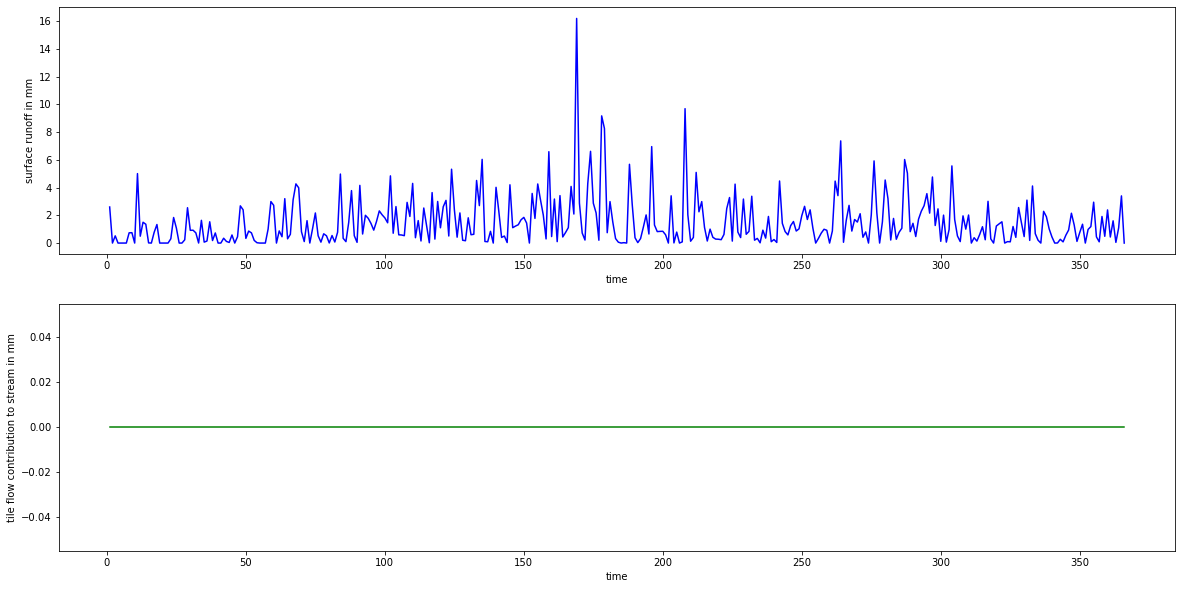

In [150]:
# plotting surface flow and tile flow

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(ann_avg.index.values, ann_avg.surq_mm, c='b')
plt.xlabel('time')
plt.ylabel('surface runoff in mm')
plt.subplot(2,1,2)
plt.plot(ann_avg.index.values, ann_avg.tileq_mm, c='g')
plt.xlabel('time')
plt.ylabel('tile flow contribution to stream in mm')